# Classification Practice

1. Download the IRIS dataset from Kaggle

>> Source: https://www.kaggle.com/arshid/iris-flower-dataset

2. Upload the IRIS.csv to Colab

>> The dataset contains a set of 150 records under 4 features (Petal Length, Petal Width, Sepal Length, Sepal width) and one label(Species).

>>The idea is to classify data using features

## Load Data

In [ ]:
import pandas as pd
data=pd.read_csv('IRIS.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Let's rename columns

In [ ]:
data=data.rename(columns={'sepal_length':'X1', 'sepal_width':'X2', 'petal_length':'X3', 'petal_width':'X4',
       'species':'L'})

In [ ]:
data

,X1,X2,X3,X4,L
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## We have a problem! 

The label is not a number, its a name of species. Use the following code to change the labels to numbers

In [ ]:
#Lets first import the preprocessing module
from sklearn import preprocessing
#Now let's form a label Encoder model
le = preprocessing.LabelEncoder()
#Now we use feed the label column to the model
le.fit(data['L'])
#Model will go through column and find the unique labels (Number of classes that are there)
#Following line will print the labels found in the column
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
#Following line will convert the labels to an array of numbers
le.transform(data['L'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Lets replace these numbers with the labels in data
data['L']=le.transform(data['L'])

In [ ]:
data.head()

,X1,X2,X3,X4,L
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


So now we are ready for classification! Labels are changed to 0,1 and 2.

## Visualize Data

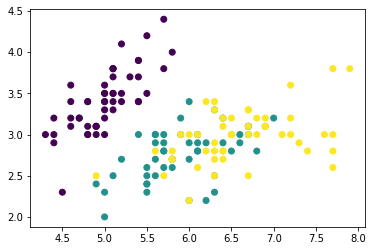

In [ ]:
import matplotlib.pyplot as plt
#plot not stressed class
plt.scatter(data['X1'], data['X2'],c=data['L'])

## Visualize Data - Suitable for different classes

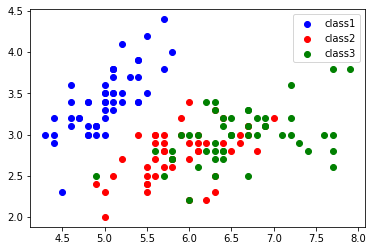

In [ ]:
plt.scatter(data['X1'][data['L']==0], data['X2'][data['L']==0],label='class1',color='blue')
plt.scatter(data['X1'][data['L']==1], data['X2'][data['L']==1],label='class2',color='red')
plt.scatter(data['X1'][data['L']==2], data['X2'][data['L']==2],label='class3',color='green')
plt.legend()

The above plot is just one representation of data because here we have 4 features so we can plot 
* X1 vs X2 
* X2 vs X3
* X3 vs X4
* X1 vs X4
* ....



## Split Data

Being consistant in the random selection from different classes!

In [ ]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(data[['X1','X2','X3','X4']], data['L'], test_size=0.3)

## K-Nearst Neighbors Classifier

1. Use the code that described in lectures and classify data using 5NN (5 nearest neighbors)

2. Then count the number of points that are missclassified in the training data and test data.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_training,Y_training)

KNeighborsClassifier()

In [ ]:
Y_training_predicted_KNN=modelKNN.predict(X_training)
Y_testing_predicted_KNN=modelKNN.predict(X_testing)

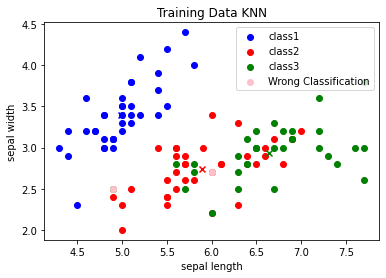

In [ ]:
plt.scatter(X_training['X1'][Y_training==0],X_training['X2'][Y_training==0],label='class1',color='blue')
plt.scatter(X_training['X1'][Y_training==1],X_training['X2'][Y_training==1],label='class2',color='red')
plt.scatter(X_training['X1'][Y_training==2],X_training['X2'][Y_training==2],label='class3',color='green')
plt.scatter(X_training['X1'][Y_training!=Y_training_predicted_KNN],X_training['X2'][Y_training!=Y_training_predicted_KNN],label='Wrong Classification', color='pink')
plt.scatter(X_training['X1'][Y_training==0].mean(),X_training['X2'][Y_training==0].mean(),marker='x', color='blue')
plt.scatter(X_training['X1'][Y_training==1].mean(),X_training['X2'][Y_training==1].mean(),marker='x', color='red')
plt.scatter(X_training['X1'][Y_training==2].mean(),X_training['X2'][Y_training==2].mean(),marker='x', color='green')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Training Data KNN')
plt.legend()

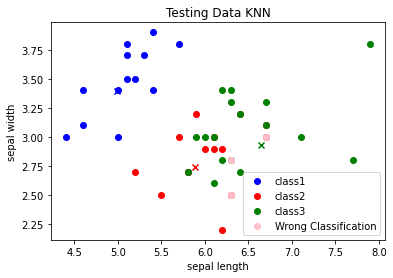

In [ ]:
plt.scatter(X_testing['X1'][Y_testing==0],X_testing['X2'][Y_testing==0],label='class1',color='blue')
plt.scatter(X_testing['X1'][Y_testing==1],X_testing['X2'][Y_testing==1],label='class2',color='red')
plt.scatter(X_testing['X1'][Y_testing==2],X_testing['X2'][Y_testing==2],label='class3',color='green')
plt.scatter(X_testing['X1'][Y_testing!=Y_testing_predicted_KNN],X_testing['X2'][Y_testing!=Y_testing_predicted_KNN],label='Wrong Classification', color='pink')
plt.scatter(X_training['X1'][Y_training==0].mean(),X_training['X2'][Y_training==0].mean(),marker='x', color='blue')
plt.scatter(X_training['X1'][Y_training==1].mean(),X_training['X2'][Y_training==1].mean(),marker='x', color='red')
plt.scatter(X_training['X1'][Y_training==2].mean(),X_training['X2'][Y_training==2].mean(),marker='x', color='green')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Testing Data KNN')
plt.legend()

In [ ]:
len(X_training['X1'][Y_training!=Y_training_predicted_KNN])

3

In [ ]:
len(X_testing['X1'][Y_testing!=Y_testing_predicted_KNN])

3

## MDC Classifier

1. Use the code that described in lectures and classify data using MDC

2. Then count the number of points that are missclassified in the training data and test data.


In [ ]:
from sklearn.neighbors import NearestCentroid
model=NearestCentroid()
model.fit(X_training,Y_training)

NearestCentroid()

In [ ]:
Y_training_predicted_MDC=model.predict(X_training)
Y_testing_predicted_MDC=model.predict(X_testing)
Y_testing_predicted_MDC

array([2, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2,
       1])

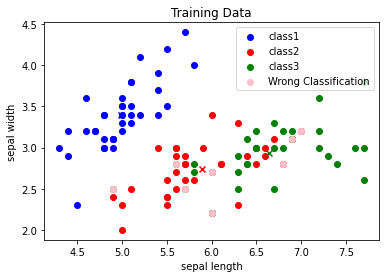

In [ ]:
plt.scatter(X_training['X1'][Y_training==0],X_training['X2'][Y_training==0],label='class1',color='blue')
plt.scatter(X_training['X1'][Y_training==1],X_training['X2'][Y_training==1],label='class2',color='red')
plt.scatter(X_training['X1'][Y_training==2],X_training['X2'][Y_training==2],label='class3',color='green')
plt.scatter(X_training['X1'][Y_training!=Y_training_predicted],X_training['X2'][Y_training!=Y_training_predicted_MDC],label='Wrong Classification', color='pink')
plt.scatter(X_training['X1'][Y_training==0].mean(),X_training['X2'][Y_training==0].mean(),marker='x', color='blue')
plt.scatter(X_training['X1'][Y_training==1].mean(),X_training['X2'][Y_training==1].mean(),marker='x', color='red')
plt.scatter(X_training['X1'][Y_training==2].mean(),X_training['X2'][Y_training==2].mean(),marker='x', color='green')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Training Data')
plt.legend()

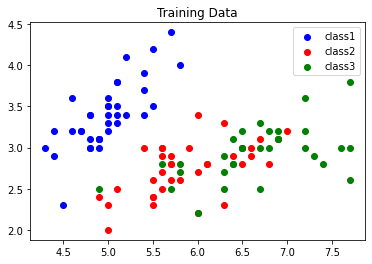

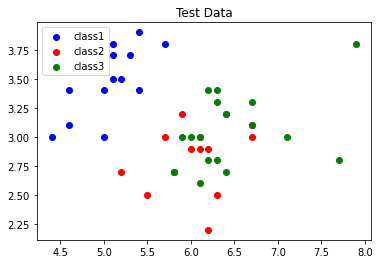

In [ ]:
plt.scatter(X_training['X1'][Y_training==0],X_training['X2'][Y_training==0],label='class1',color='blue')
plt.scatter(X_training['X1'][Y_training==1],X_training['X2'][Y_training==1],label='class2',color='red')
plt.scatter(X_training['X1'][Y_training==2],X_training['X2'][Y_training==2],label='class3',color='green')
plt.title('Training Data')
plt.legend()
plt.figure()
plt.scatter(X_testing['X1'][Y_testing==0],X_testing['X2'][Y_testing==0],label='class1',color='blue')
plt.scatter(X_testing['X1'][Y_testing==1],X_testing['X2'][Y_testing==1],label='class2',color='red')
plt.scatter(X_testing['X1'][Y_testing==2],X_testing['X2'][Y_testing==2],label='class3',color='green')
plt.title('Test Data')
plt.legend()

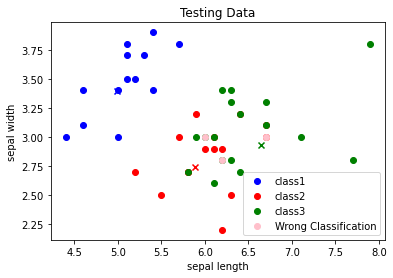

In [ ]:
plt.scatter(X_testing['X1'][Y_testing==0],X_testing['X2'][Y_testing==0],label='class1',color='blue')
plt.scatter(X_testing['X1'][Y_testing==1],X_testing['X2'][Y_testing==1],label='class2',color='red')
plt.scatter(X_testing['X1'][Y_testing==2],X_testing['X2'][Y_testing==2],label='class3',color='green')
plt.scatter(X_testing['X1'][Y_testing!=Y_testing_predicted_MDC],X_testing['X2'][Y_testing!=Y_testing_predicted_MDC],label='Wrong Classification', color='pink')
plt.scatter(X_training['X1'][Y_training==0].mean(),X_training['X2'][Y_training==0].mean(),marker='x', color='blue')
plt.scatter(X_training['X1'][Y_training==1].mean(),X_training['X2'][Y_training==1].mean(),marker='x', color='red')
plt.scatter(X_training['X1'][Y_training==2].mean(),X_training['X2'][Y_training==2].mean(),marker='x', color='green')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Testing Data')
plt.legend()

In [ ]:
len(X_training['X1'][Y_training!=Y_training_predicted_MDC])

8

In [ ]:
len(X_testing['X1'][Y_testing!=Y_testing_predicted_MDC])

3